# <font face="Times New Roman" size="6">Transferencia de Calor y Masa</font>
# <font face="Times New Roman" size="6" color='gray'>Vapor condensado a 6 kPa</font>   

# Enunciado

Calcular el flujo de calor para una placa cuadrada de 1 m de lado la cual condensa vapor a 6 kPa. Considere tres orientaciones posibles para la placa: (1) horizontal cara hacia abajo; (2) horizontal cara hacia arriba;
(3) vertical (un sólo lado se encuentra activo).

**(a)** Grafique el flujo de calor para cada orientación en función de la temperatura de la superficie de la placa.<br>
**(b)** Decida cuál es la configuración que brinda la mayor velocidad de condensación por unidad de area superficial.<br>
**(c)** Establezca las modificaciones que se producen si reducimos las dimensiones de la placa a 0.5 m por lado.

# Solución
## Datos

Propiedades del agua saturada a $P_{sat}$ = 6 kPa = 0.06 bar (ver Tabla A.6 de <a name="ref-1"/>[Incropera, 2007](#cite-incropera2007fundamentals)):
* $T_{sat}$ = 310 K
* $\rho_{l,sat}$ = 993.04 kg/m$^{3}$
* $\rho_{v,sat}$ = 0.0436 kg/m$^{3}$
* $\Delta i_{vap}$ = 2414 kJ/kg
* $\mu_{l,sat}$ = 695$\cdot10^{-6}$ N$\cdot$s/m$^{2}$
* $k_{l,sat}$ = 628$\cdot10^{-3}$ W/m$\cdot$K
* $\sigma$ = 70$\cdot10^{-3}$ N/m

Dimensiones de la placa:
* $L$ = 1 m
* $W$ = 1 m
* $A=L\cdot W$

Inicialmente asignamos un valor para la temperatura de la superficie:
* $T_w=T_{sat}-10$

## Desarrollo

En primer lugar, importamos varios paquetes Python requeridos en este cuaderno. El comando `%matplotlib inline` garantiza que las figuras se exhiban dentro del cuaderno Jupyter.

In [2]:
import numpy as np
#import CoolProp as CP
from iapws import IAPWS97
import IPython.display as ipd
from matplotlib import pyplot as plt
%matplotlib inline

# *********** Datos ***********
g=9.8
rho_lsat=993.04
rho_vsat=0.0436
Deltai_vap=2414.0*1000
mu_lsat= 695.0e-6
k_lsat=628.0e-3
sigma=70.0e-3
T_sat=310.0
T_w=T_sat-10.0
L=1.0
W=1.0
A=L*W

In [3]:
agua_condensado = IAPWS97(P=6e-3, x=0)  
rho_a = agua_condensado.rho
k_a = agua_condensado.k
cp_a = agua_condensado.cp*1e3
nu_a = agua_condensado.nu

vapor_condensado = IAPWS97(P=6e-3, x=1)  
vapor_condensado.T
rho_v = vapor_condensado.rho
k_v = vapor_condensado.k
cp_v = vapor_condensado.cp*1e3
nu_v = vapor_condensado.nu

print('densidad agua %.2f, densidad vapor= %.2f'%(rho_a,rho_v))
print('viscosidad agua %.2e, viscosidad vapor= %.2e'%(nu_a,nu_v))

densidad agua 993.59, densidad vapor= 0.04
viscosidad agua 7.07e-07, viscosidad vapor= 2.39e-04


In [4]:
agua_condensado.cp

4.179041149141414

### Placa horizontal cara hacia abajo

A fin de obtener el coeficiente de transferencia de calor para la condensación en película sobre una placa horizontal cara hacia abajo ($\bar{h}_{ra}$), recurrimos a la correlación de Gerstmann y Griffith, 1967 (Ver Seccion 7.4.3 de <a name="ref-2"/>[Nellis, 2008](#cite-nellis_klein_2008)):

\begin{equation}
\frac{\bar{h}}{k_{l, s a t}} \sqrt{\frac{\sigma}{\left(\rho_{l, s a t}-\rho_{v, s a t}\right) g}}=0.81 R a^{0.193}\;\;,
\;\;\;\;\;\;1\cdot10^{8}<Ra<1\cdot10^{10}
\end{equation}

donde
\begin{equation}
R a=\frac{g \rho_{l, s a t}\left(\rho_{l, s a t}-\rho_{v, s a t}\right) \Delta i_{v a p}}{\mu_{l, s a t}\left(T_{s a t}-T_{w}\right)k_{l, s a t}}\left[\frac{\sigma}{\left(\rho_{l, s a t}-\rho_{v, s a t}\right) g}\right]^{3 / 2}
\end{equation}

La velocidad de transferencia de calor está dada por la ley de enfriamiento de Newton:

\begin{equation}
\dot{q}_{ra}=A\;\bar{h}_{ra}\left(T_{sat}-T_{w}\right)
\end{equation}

In [1]:
# numero de Rayleigh 
Ra=(g*rho_lsat*(rho_lsat-rho_vsat)*Deltai_vap)/(mu_lsat*(T_sat-T_w)*k_lsat)*((sigma)/((rho_lsat-rho_vsat)*g))**(3/2)

# longitud caracteristica
Lc=np.sqrt(sigma/((rho_lsat-rho_vsat)*g))

# coeficiente de transferencia
h_ra=0.81*(Ra**0.193)*k_lsat/Lc

# velocidad de transferencia
q_ra=A*h_ra*(T_sat-T_w)

# ****** Resultados ******
objeto0 = ipd.Math(r'\textrm{Resultados a } T_{w} = %s'%format(T_w,'6.0f')+'\;K:')
objeto1 = ipd.Math(r'\longrightarrow Ra = %s'%format(Ra,'8.4e'))
objeto2 = ipd.Math(r'\longrightarrow \bar{h}_{ra} = %s'%format(h_ra,'6.1f')+'\;W/m^{2}K')
objeto3 = ipd.Math(r'\longrightarrow \dot{q}_{ra} = %s'%format(q_ra,'6.1f')+'\;W')
ipd.display(objeto0,objeto1,objeto2,objeto3)

NameError: name 'g' is not defined

### Placa horizontal cara hacia arriba

A fin de obtener el coeficiente de transferencia de calor para la condensación en película sobre una placa horizontal cara hacia arriba ($\bar{h}_{rb}$), recurrimos a la correlación de Nimmo y Leppert, 1970 (Ver Seccion 7.4.3 de <a name="ref-2"/>[Nellis, 2008](#cite-nellis_klein_2008)):

\begin{equation}
\frac{\bar{h} L}{k_{l, s a t}}=0.82\left[\frac{\rho_{l, s a t}^{2} g \Delta i_{v a p} L^{3}}{\mu_{l, s a t}\left(T_{s a t}-T_{w}\right) k_{l, s a t}}\right]^{1 / 5}
\end{equation}

La velocidad de transferencia de calor está dada por la ley de enfriamiento de Newton:

\begin{equation}
\dot{q}_{rb}=A\;\bar{h}_{rb}\left(T_{sat}-T_{w}\right)
\end{equation}

In [3]:
# numero de Nusselt 
Nu=0.82*((rho_lsat**2*g*Deltai_vap*L**3)/(mu_lsat*(T_sat-T_w)*k_lsat))**(1/5)

# coeficiente de transferencia
h_rb=Nu*k_lsat/L

# velocidad de transferencia
q_rb=A*h_rb*(T_sat-T_w)

# ****** Resultados ******
objeto0 = ipd.Math(r'\textrm{Resultados a } T_{w} = %s'%format(T_w,'6.0f')+'\;K:')
objeto1 = ipd.Math(r'\longrightarrow Nu = %s'%format(Nu,'8.4e'))
objeto2 = ipd.Math(r'\longrightarrow \bar{h}_{rb} = %s'%format(h_rb,'6.1f')+'\;W/m^{2}K')
objeto3 = ipd.Math(r'\longrightarrow \dot{q}_{rb} = %s'%format(q_rb,'6.1f')+'\;W')
ipd.display(objeto0,objeto1,objeto2,objeto3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Placa vertical

A fin de obtener el coeficiente de transferencia de calor para la condensación en película sobre una placa vertical ($\bar{h}_{v}$), recurrimos a la correlación de Butterworth, 1981 (Ver Seccion 7.4.3 de <a name="ref-2"/>[Nellis, 2008](#cite-nellis_klein_2008)):

\begin{equation}
\frac{\bar{h}}{k_{l, s a t}}\left[\frac{\mu_{l, s a t}^{2}}{\rho_{l, s a t}\left(\rho_{l, s a t}-\rho_{v, s a t}\right) g}\right]^{1 / 3}=\frac{R e_{c}}{1.08 R e_{c}^{1.22}-5.2}\;\;,
\;\;\;\;\;\;30<Re_{c}<1600
\end{equation}

donde el número de Reynolds para la película de condensado, $Re_{c}$, se define en base a la velocidad media del líquido en la película ($u_m$) y al diámetro hidráulico asociado al flujo a través de la película ($D_h$). Se tiene:

\begin{equation}
\dot{m}_{c}=\rho_{l,sat}\;u_{m}W\delta
\end{equation}

\begin{equation}
D_{h}=\frac{4 A_{c}}{p e r}=\frac{4 W \delta}{2 W}=2 \delta
\end{equation}

donde $\dot{m}_{c}$ es el caudal másico de líquido condensado y $\delta$ el espesor de película. Entonces:

\begin{equation}
R e_{c}=\frac{\rho_{l, s a t}\;u_{m} D_{h}}{\mu_{l, s a t}}=\frac{2 \dot{m}_{c}}{W \mu_{l, s a t}}
\end{equation}

La velocidad de transferencia de calor está dada por la ley de enfriamiento de Newton:

\begin{equation}
\dot{q}_{v}=A\;\bar{h}_{v}\left(T_{sat}-T_{w}\right)
\end{equation}

### Procedimiento de cálculo

El caudal de condensado $\dot{m}_{c}$ usualmente no se especifica por lo cual debe calcularse. Esto conduce a un proceso iterativo a fin de obtener el número de Reynolds y el coeficiente de transferencia.
En el estado estacionario, existe un balance entre la velocidad a la cual el elemento calentador produce vapor y la velocidad a la cual se produce condensado en la placa. 
Como punto de partida, suponemos un número de Reynolds y calculamos el coeficiente $\bar{h}_{v}$ y la velocidad de transferencia $\dot{q}_{v}$. Teniendo en cuenta que el caudal másico de vapor está dado por:
\begin{equation}
\dot{m}_{v}=\frac{\dot{q}_{v}}{\Delta i_{vap}}
\end{equation} 

ajustamos el número de Reynolds de forma tal de satisfacer el balance $\dot{m}_{c}=\dot{m}_{v}$.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

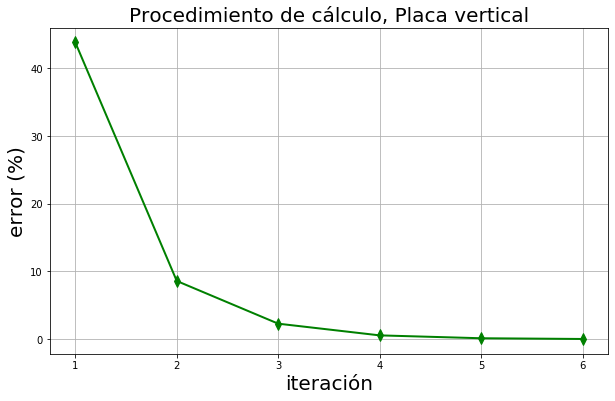

In [20]:
# longitud caracteristica
Lc=((mu_lsat**2)/(rho_lsat*(rho_lsat-rho_vsat)*g))**(1/3)

# ********* Proceso iterativo *********
Re_out=100.0
TOL=0.1
error=100.0
niter=0
iterv=np.array([]).astype(int)
errorv=np.array([])

while error>TOL:
    Re=Re_out
    
    Nu=Re/(1.08*(Re**1.22)-5.2) # numero de Nusselt 
    h_v=Nu*k_lsat/Lc # coeficiente de transferencia
    q_v=A*h_v*(T_sat-T_w) # velocidad de transferencia
    mv=q_v/Deltai_vap # caudal masico de vapor
    mc=mv # caudal masico de condensado
    Re_out=2*mc/(W*mu_lsat) # numero de Reynolds

    error=np.abs(Re-Re_out)/Re_out*100
    niter=niter+1
    errorv=np.append(errorv,error)
    iterv=np.append(iterv,niter)

# ********* Grafica error *********
plt.figure(figsize=(10,6))
plt.plot(iterv,errorv,color='g',marker='d',markersize=8,linestyle='-',linewidth=2)
plt.xlabel('iteración',fontsize=20,color='k')
plt.ylabel('error (%)',fontsize=20,color='k')
plt.title('Procedimiento de cálculo, Placa vertical',fontsize=20)
plt.grid(b=True,which='major')
plt.grid(b=True,which='minor')

# ****** Resultados ******
objeto0 = ipd.Math(r'\textrm{Resultados a } T_{w} = %s'%format(T_w,'6.0f')+'\;K:')
objeto1 = ipd.Math(r'\longrightarrow Re_{c} = %s'%format(Re_out,'6.2f'))
objeto2 = ipd.Math(r'\longrightarrow \bar{h}_{v} = %s'%format(h_v,'6.1f')+'\;W/m^{2}K')
objeto3 = ipd.Math(r'\longrightarrow \dot{q}_{v} = %s'%format(q_v,'6.1f')+'\;W')
ipd.display(objeto0,objeto1,objeto2,objeto3)

## Efecto causado por cambios en la temperatura de pared

A continuación, procuramos construir las funciones $\dot{q}_{ra}=f_{a}(T_{w})$, $\dot{q}_{rb}=f_{b}(T_{w})$ variando la temperatura de la superficie en el rango $[T_{sat}-10,T_{sat})$.

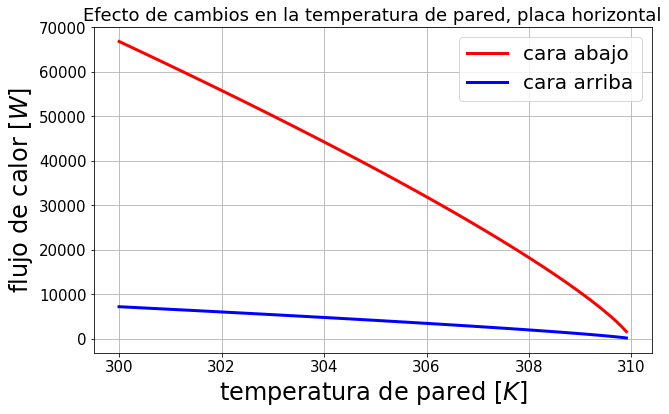

In [36]:
def condensate():
    
    # Placa horizontal cara hacia abajo
    Ra=(g*rho_lsat*(rho_lsat-rho_vsat)*Deltai_vap)/(mu_lsat*(T_sat-T_w)*k_lsat)*((sigma)/((rho_lsat-rho_vsat)*g))**(3/2)
    Lc=np.sqrt(sigma/((rho_lsat-rho_vsat)*g))
    h_ra=0.81*(Ra**0.193)*k_lsat/Lc
    q_ra=A*h_ra*(T_sat-T_w)
    
    # Placa horizontal cara hacia arriba
    Nu=0.82*((rho_lsat**2*g*Deltai_vap*L**3)/(mu_lsat*(T_sat-T_w)*k_lsat))**(1/5)
    h_rb=Nu*k_lsat/L
    q_rb=A*h_rb*(T_sat-T_w)
    
    return q_ra,q_rb

q_ra_v = []
q_rb_v = []
Twini=T_sat-10; Twfin=T_sat; dTw=0.1
temps = np.arange(Twini,Twfin,dTw)

for T_w in temps: # [K]
    [q_ra,q_rb]=condensate()
    q_ra_v.append(q_ra)
    q_rb_v.append(q_rb)

# ********* GRAFICA ********* 
plt.figure(figsize=(10,6))
plt.plot(temps,q_ra_v,'r-',lw=3,label='cara abajo')
plt.plot(temps,q_rb_v,'b-',lw=3,label='cara arriba')
plt.ylabel('flujo de calor [$W$]',fontsize=24,color='k')
plt.xlabel('temperatura de pared [$K$]',fontsize=24,color='k')
plt.tick_params(axis='both',which='major',labelsize=15)
plt.grid(b=True,which='major')
plt.title('Efecto de cambios en la temperatura de pared, placa horizontal',fontsize=18)
plt.legend(fontsize=20);

<div class="alert alert-block alert-warning">
<h2>Respuesta (b)</h2>       

La placa horizontal cara abajo resulta la configuración que brinda la mayor velocidad de condensación. El mejor desempeño se logra en aquella configuración para la cual la gravedad contribuye en mayor parte al drenaje del condensado.
</div>

## Efecto causado al reducir las dimensiones de la placa

Finalmente, procuramos evaluar cómo se modifican las funciones $\dot{q}_{ra}=f_{a}(T_{w})$, $\dot{q}_{rb}=f_{b}(T_{w})$ al reducir las dimensiones de la placa a 0.5 m por lado.

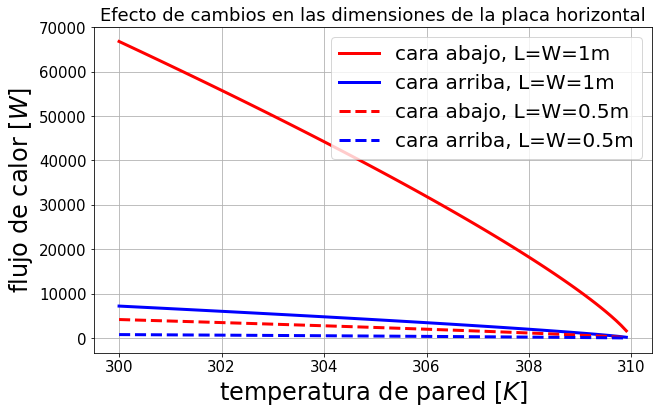

In [38]:
# Geometria de la nueva configuracion
L=L/2
W=W/2
A=L*W

# Funciones resultado de la nueva configuracion
q_ra_v1 = []
q_rb_v1 = []

for T_w in temps: # [K]
    [q_ra,q_rb]=condensate()
    q_ra_v1.append(q_ra)
    q_rb_v1.append(q_rb)

# ********* GRAFICA ********* 
plt.figure(figsize=(10,6))
plt.plot(temps,q_ra_v,'r-',lw=3,label='cara abajo, L=W=1m')
plt.plot(temps,q_rb_v,'b-',lw=3,label='cara arriba, L=W=1m')
plt.plot(temps,q_ra_v1,'r--',lw=3,label='cara abajo, L=W=0.5m')
plt.plot(temps,q_rb_v1,'b--',lw=3,label='cara arriba, L=W=0.5m')
plt.ylabel('flujo de calor [$W$]',fontsize=24,color='k')
plt.xlabel('temperatura de pared [$K$]',fontsize=24,color='k')
plt.tick_params(axis='both',which='major',labelsize=15)
plt.grid(b=True,which='major')
plt.title('Efecto de cambios en las dimensiones de la placa horizontal',fontsize=18)
plt.legend(fontsize=20);

<!--bibtex

@book{incropera2007fundamentals,
  title={Fundamentals of heat and mass transfer},
  author={Incropera, Frank P and Lavine, Adrienne S and Bergman, Theodore L and DeWitt, David P},
  year={2007},
  publisher={Wiley}
}

@book{nellis_klein_2008, place={Cambridge}, title={Heat Transfer}, DOI={10.1017/CBO9780511841606}, publisher={Cambridge University Press}, author={Nellis, Gregory and Klein, Sanford}, year={2008}}

... Other Bibtex entries go here.

-->

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

... Other Bibtex entries go here.

-->

# References

<a name="cite-incropera2007fundamentals"/><sup>[^](#ref-1) </sup>Incropera, Frank P and Lavine, Adrienne S and Bergman, Theodore L and DeWitt, David P. 2007. _Fundamentals of heat and mass transfer_.

<a name="cite-nellis_klein_2008"/><sup>[^](#ref-2) </sup>Nellis, Gregory and Klein, Sanford. 2008. _Heat Transfer_.

